# Freezer 하나가 Sensor의 온도에 미치는 영향

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tqdm import tqdm
import os
import seaborn as sns

In [22]:
sensor_id = [329, 332, 335]
freezer_id = [344, 362, 368]

In [23]:
df5 = pd.read_csv('df5_2102.csv')
df5['gw_time'] = pd.to_datetime(df5['gw_time'])
df5 = df5[['gw_time']+['temperature_'+str(_id) for _id in sensor_id]+['operation_'+str(_id) for _id in freezer_id] + ['dT_' + str(_id) for _id in sensor_id]]

In [24]:
df5_time = pd.DataFrame(df5['gw_time'])

In [25]:
df5_one = df5.loc[df5['operation_344']+df5['operation_362']+df5['operation_368'] <= 1]

In [26]:
df0 = pd.merge(df5_time, df5_one, how = 'outer', on = 'gw_time')

In [27]:
def test_plot(a=0,b=-1, figure=df0):
    test_figure = figure[a:b]
    plt.figure(figsize = (24,10))
    print('Plotting {}:{}'.format(a,b))
    plt.subplot(2,1,1)
    plt.title("operation of freezers")
    w = 0
    for _id in freezer_id:
        plt.plot(test_figure['gw_time'],test_figure['operation'+'_'+str(_id)]+w, label = 'operation'+'_'+str(_id),alpha = 1)
        w+= 0.015
    plt.ylabel('operation')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('temperature of sensors')
    for _id in sensor_id:
        plt.plot(test_figure['gw_time'],test_figure['temperature'+'_'+str(_id)], label = 'temperature'+'_'+str(_id),alpha = 1)
    plt.ylabel('temperature')
    plt.grid()
    plt.legend()
    plt.show()
    return test_figure


In [28]:
df0

,gw_time,temperature_329,temperature_332,temperature_335,operation_344,operation_362,operation_368,dT_329,dT_332,dT_335
0,2021-02-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 00:00:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 00:01:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 00:01:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 00:02:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
80124,2021-02-28 23:57:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80125,2021-02-28 23:58:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80126,2021-02-28 23:58:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80127,2021-02-28 23:59:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting 2000:3000


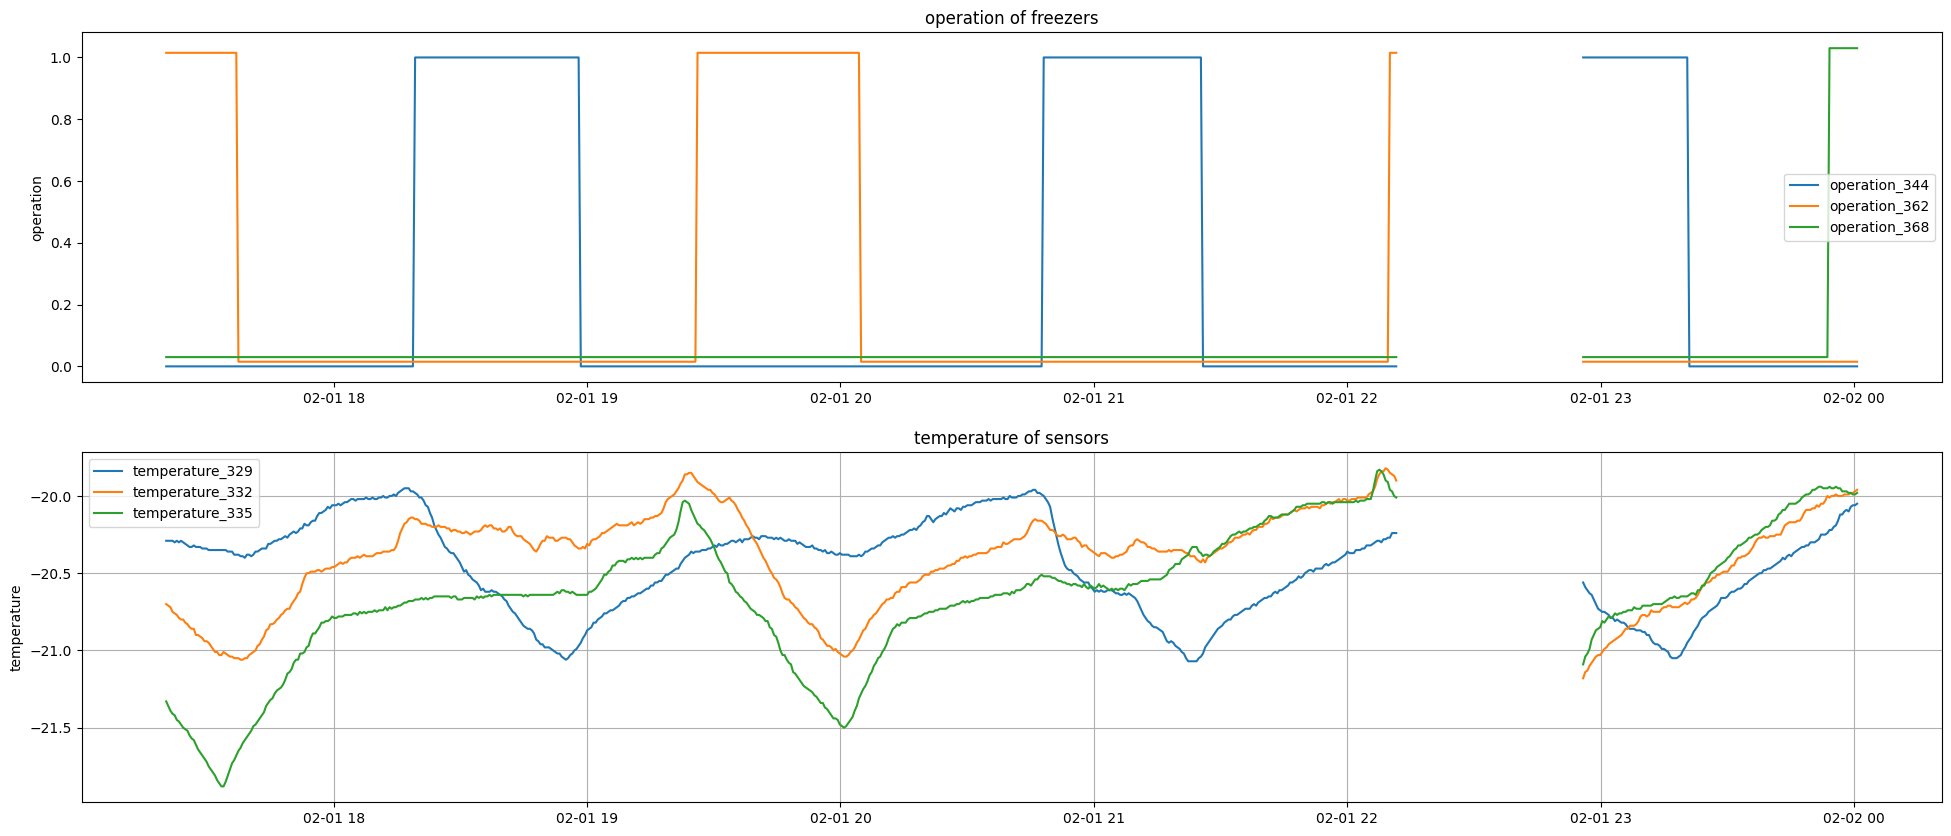

,gw_time,temperature_329,temperature_332,temperature_335,operation_344,operation_362,operation_368,dT_329,dT_332,dT_335
2000,2021-02-01 16:45:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2021-02-01 16:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2021-02-01 16:46:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2021-02-01 16:47:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2021-02-01 16:47:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2995,2021-02-02 01:06:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2021-02-02 01:06:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2021-02-02 01:07:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2021-02-02 01:07:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
test_plot(2000,3000, df0)

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_492\4201822029.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df5.corr(), dtype= np.bool_)
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_492\4201822029.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df5.corr(), linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})


<AxesSubplot: title={'center': 'correlation between condition of freezer and temperature'}>

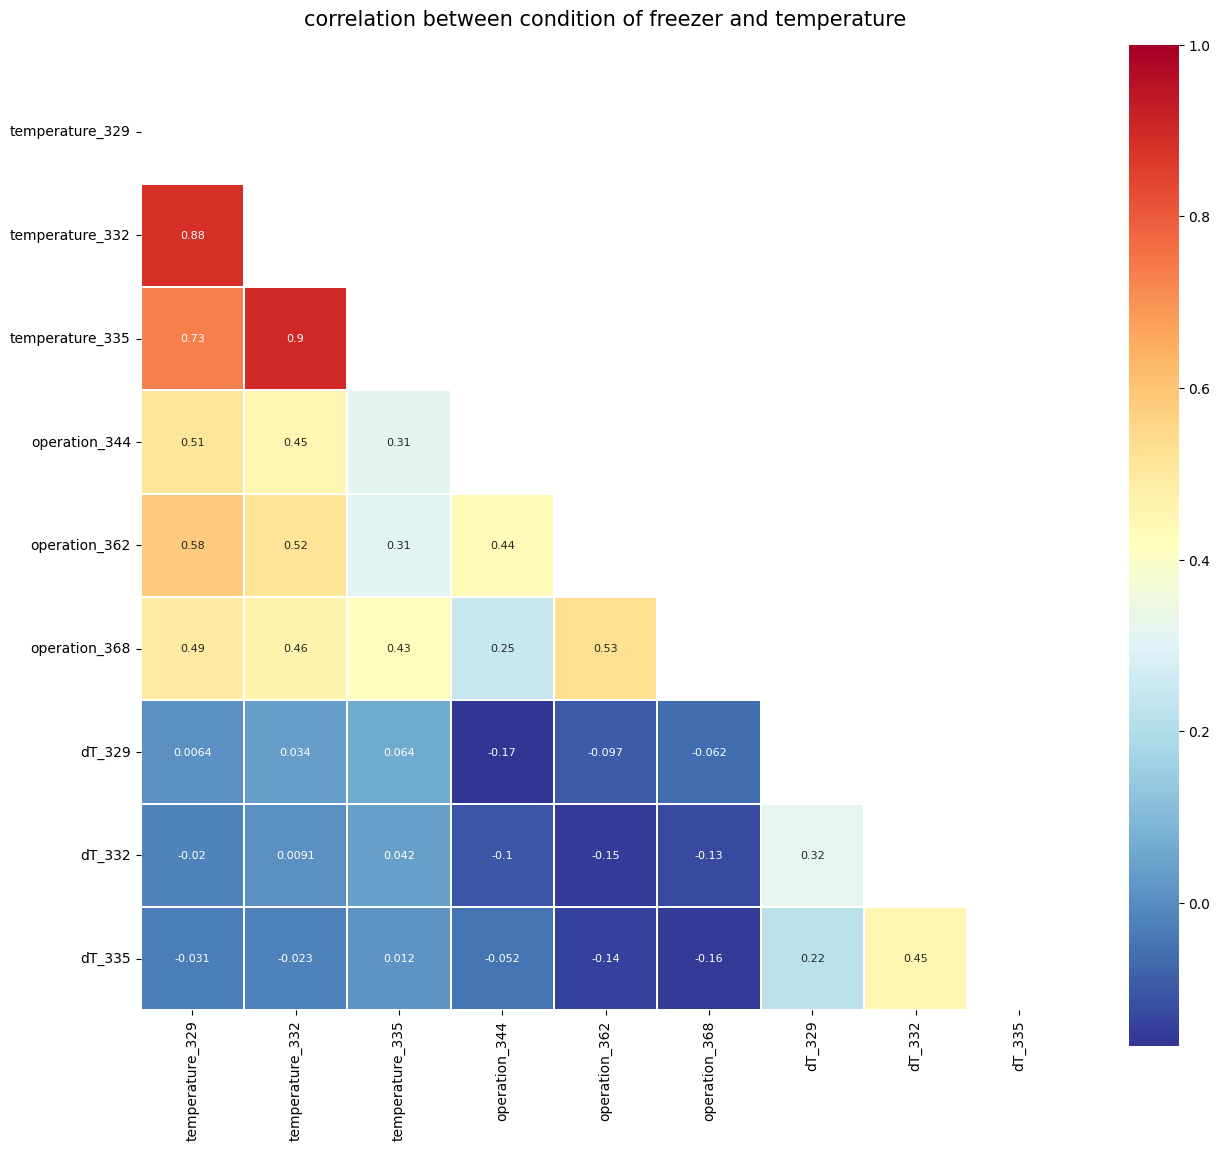

In [33]:

mask = np.zeros_like(df5.corr(), dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True

colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("correlation between condition of freezer and temperature", y = 1.05, size = 15)
sns.heatmap(df5.corr(), linewidths = 0.1,mask= mask, vmax = 1.0,square = True, cmap = 'RdYlBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})
